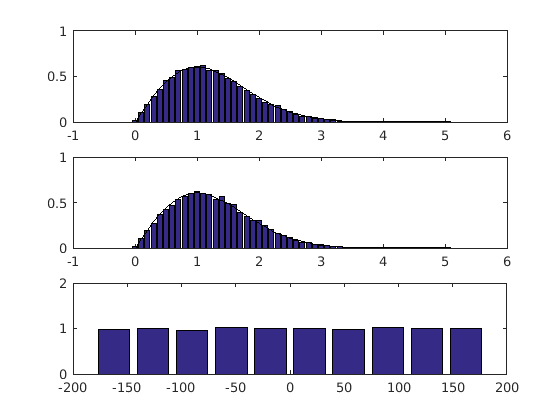

In [2]:
%Parametros
N = 20000;                                        %numero de amostras
ts = 0.1;
x = 0:ts:(5+ts);                              %eixo X
sigm = 1;
u = rand(N,1);                                    %Amostras aleat�rias uniformemente distribuidas
%% canal rayleigh real via m�todo de inversao
rReal = sigm*sqrt(-2*log(u));

pdfTeo = x/(sigm^2).*exp(-(x/sigm).^2/2);         %PDF rayleigh teorico

%
%% canal Rayleigh complexo via VAs Gaussianas independentes
rComplexo = randn(N,1)+j*randn(N,1);

%%graficos
figure
subplot(3,1,1)
%Histograma do canal real vs PDF teorica
[xh,temp] = hist(rReal,x);

width = ts;
a=plot(x,pdfTeo,'k');
hold on
b=bar(temp,xh/(sum(xh)*ts));
uistack(b,'bottom');

% Histograma da envolt�ria do canal complexo vs PDF te�rica
subplot(3,1,2)
[xh, temp]=hist(abs(rComplexo),x);
width = ts;
plot(x,pdfTeo,'k');
hold on
b=bar(temp,xh/(sum(xh)*ts));
uistack(b,'bottom');
% Histrograma da Fase do Canal complexo
subplot(3,1,3)
[xhra, tempra]=hist(angle(rComplexo));
bar(180/pi*tempra,xhra/(sum(xhra)*ts));

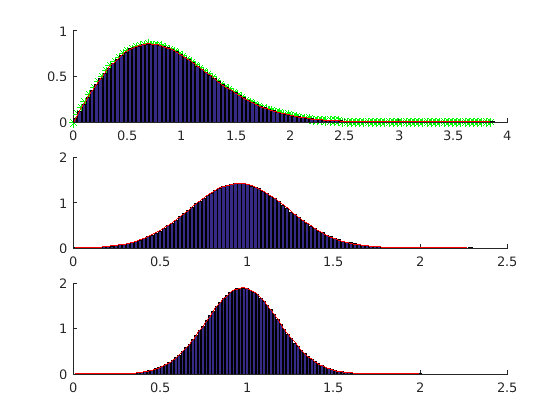

In [3]:
N = 1e6;                         %numero de amostras
vtk = [0 5 10];                   %fatores K Ricianos a simular
totPower = 1;                     %total power of Los Path & Scattered path


% for loop valores de K
for ik=1:length(vtk);
    subplot(length(vtk),1,ik)
    hold on
    K = vtk(ik);
    s = sqrt(K/(K+1)*totPower);            % parametro de nao centralidade
    sigma = totPower/sqrt(2*(K+1));
    %Amostras do canal Rice
    X = s + sigma*randn(N,1);                %LOS: VA Gaussiana com media=s e sigma definido
    Y = 0 + sigma*randn(N,1);                %NLOS: Gaussiana com media=0 e sigma definido
    Z = X + j*Y;
    [val,bins] = hist(abs(Z),100);         %Histograma de Z
    %
    % PDF Rice Teorica
    binWidth = bins(2)-bins(1);
    r = 0:binWidth:max(bins);
    %PDF teorica rayleigh
    if K == 0
        rayleigh_PDF = r./(sigma^2).*exp(-r.^2/(2*sigma^2));
        plot(r,rayleigh_PDF,'g*')
    end
    fRice = 2*r*(K+1)/totPower.*exp(-r.^2*(K+1)/totPower-K).*besseli(0,2*r*sqrt(K*(K+1)/totPower));
    % graficos
    bar(bins,val/(binWidth*sum(val)))
    plot(r,fRice,'r')
    
end

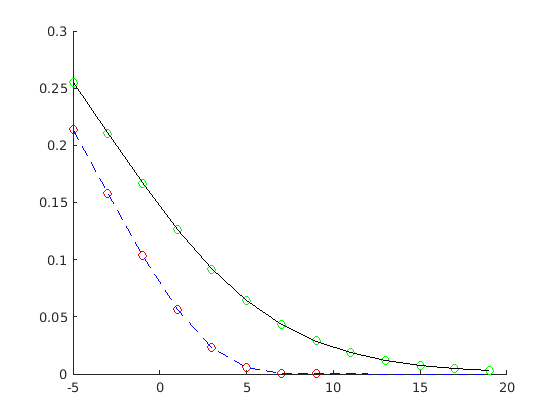

In [4]:
N = 1e6;                            %numero de simbolos BPSK
EbN0dB = -5:2:20;                   %valores de EbN0  simular
% Transmissor
d = rand(N,1)>0.5;                  %dados binarios
x = 2*d -1;                         %simbolos BPSK: 0 representa -1 e 1 representa 1

%% Inicializacao de vetores de BER simulada e teorica
BER_rayleigh_simulada = zeros(length(EbN0dB));
BER_awgn_simulada = zeros(length(EbN0dB));

%
%%loop EbN0
for i=1:length(EbN0dB)
    %canal
    %ruido AWGN complexo com media 0 e variancia 1
    noise = 1/sqrt(2)*(randn(N,1)+j*randn(N,1));
    n = noise*10^(-EbN0dB(i)/20);
    %Desvainecimento rayleigh normalizado
    h = 1/sqrt(2)*(randn(N,1)+j*randn(N,1));
    %sinal recebido para canal somente AWGN
    y_awgn = x + n;
    %sinal recebido para desvainecimento rayleigh
    y_rayleigh = h.*x + n;
    %Equalizador
    y_rayleigh_cap=y_rayleigh./h;
    % Receptor para o canal somente AWGN
    r_awgn = real(y_awgn) > 0; 
    % Receptor para o canal rayleigh
    r_rayleigh = real(y_rayleigh_cap)>0;
    %Contador de erro para o caso com Rayleigh e AWGN
    BER_rayleigh_simulada(i) = sum(xor(d,r_rayleigh));
    % Contador de erro para o caso com somente AW
    BER_awgn_simulada(i) = sum(xor(d,r_awgn));
end
%calculo de BER para rayleigh
BER_rayleigh_simulada = BER_rayleigh_simulada/N;
%calculo de BER para awgn
BER_awgn_simulada = BER_awgn_simulada/N;
% Pe Te�rica
EbN0=10.^(EbN0dB/10);            % Eb/N0 em escala linear
% Implementa��o direta da equa��o de Pe para o canal Rayleigh+AWGN
BER_rayleigh_teorica = 0.5.*(1-sqrt(EbN0).*sqrt((1./(1+EbN0)))); 
% Implementa��o direta da equa��o de Pe para o canal somente AWGN
BER_awgn_teorica = qfunc(sqrt(2*EbN0));

%% graficos
figure
hold on
semilogy(EbN0dB(find(BER_rayleigh_simulada>0)),BER_rayleigh_simulada(find(BER_rayleigh_simulada>0)),'go')
semilogy(EbN0dB(find(BER_awgn_simulada>0)),BER_awgn_simulada(find(BER_awgn_simulada>0)),'ro')
semilogy(EbN0dB,BER_rayleigh_teorica,'k-')
semilogy(EbN0dB,BER_awgn_teorica,'b--')

Simulando K = 0
Simulando K = 5
Simulando K = 30


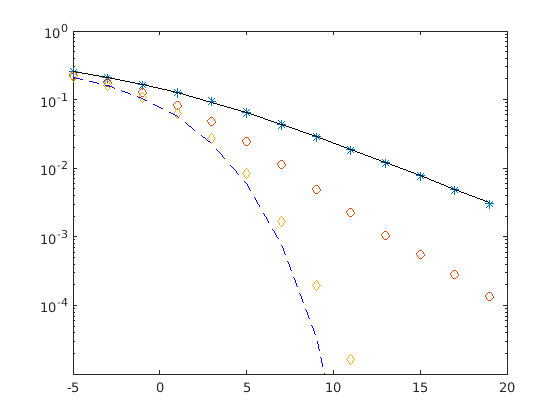

In [1]:
%Parametros
N = 10^6;                                   %numero de s�mnolos BPSK a serem transmitidos
EbN0dB = -5:2:20;                           %valores EbN0 a simular
EbN0 = 10.^(EbN0dB/10);                     %EbN0 em escala linear
totPower = 1;                               %Potencia total (LOS + NLOS)
K = [0 5 30];                               %valores de K Ricianos a simular

%% Transmissor

d = rand(N,1) > 0.5;                        %Dados bin�rios
x = 2*d -1;                                 %s�mbolos BPSK

%% inicializacao de valores BER simulada e teorica

simBER_ricean = zeros(length(EbN0dB),1);
figure
plotStyleSim=['*' 'o' 'd' ];

%% Loop de K Riciano

for index = 1:length(K)
    k = K(index);                           %valor de k corrente
    plotStyle = plotStyleSim(index);
    % mensagem de processo da simulacao
    disp(['Simulando K = ' num2str(k)])
    %canal 
    %parametro de nao centralidade e sigma de Rice
    s = sqrt(k/(k+1)*totPower);
    sigma = totPower/sqrt(2*(k+1));
    %
    % loop de EbNo
    for i = 1:length(EbN0dB)
        %Continuacao do canal
        %
        %Ruido AWGN complexo com media 0 e variancia 1
        noise = 1/sqrt(2)*(randn(N,1)+j*randn(N,1));
        %vetor de ruido com potencia proporcional a EbN0 corrente
        n = noise*10^(-EbN0dB(i)/20);
        h = ((sigma*randn(N,1)+s)+j*(randn(N,1)*sigma+0));
        %
        %receptor
        %Sinal recebido do canal Rice e AWGN
        y_ricean = h.*x+n;
        %Receptor coerente : equalizacao + decisao
        y_ricean_cap = y_ricean./h;
        r_ricean = real(y_ricean_cap)>0;
        %contador de erro
        simBER_ricean(i) = sum(xor(d,r_ricean));
        %fim do noo EbNo
    end
       
    %calculo da BER para valor k corrente
    simBER_ricean = simBER_ricean/N;
    semilogy(EbN0dB,simBER_ricean,plotStyle);
    hold on
end

BER_rayleigh_teorica = 0.5*(1-sqrt(EbN0./(1+EbN0))); 
BER_awgn_teorica = qfunc(sqrt(2*EbN0));
%% graficos
% Rayleigh te�rico
hold on
semilogy(EbN0dB,BER_rayleigh_teorica,'k-')
% AWGN te�rico
hold on
semilogy(EbN0dB,BER_awgn_teorica,'b--')
ylim([10e-6 1])
hold off
legend('Rice com k=0','Rice com k=10','Rice com k=30','rayleigh Teorica','AWGN teorica')